# Telco Customer Churn Data Analysis


     1) Compare churn count with respect to gender.
     2) Findout how many female senior citizen there in the dataset
     3) Compare 'tenure' with 'Total Charges'
     4) Findout which contract preffered by the senior citizen.
     5) Comment your findings on Payment Method?

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Telco Customer Churn dataset

In [270]:
df=pd.read_excel("Telco-Customer-Churn.xlsx")

In [287]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [271]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Compare churn count with respect to gender.

In [141]:
churnData=df[df["Churn"]=="Yes"]

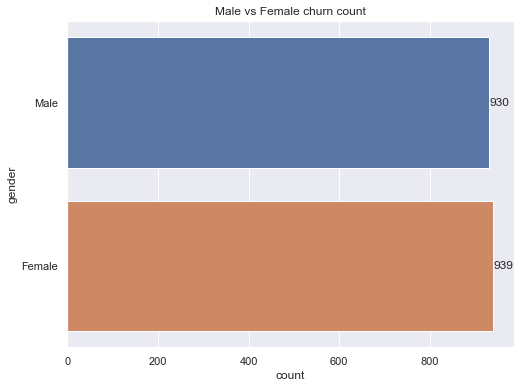

In [303]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
ax=sns.countplot(y="gender", data=churnData)
plt.title("Male vs Female churn count");
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_width()+2,   p.get_y()+p.get_height()/2), 
                ha = 'center', va = 'center', xytext = (10, 0), 
                textcoords = 'offset points')

### Insights

    There female customer churn count is 939 and male customer churn count is 930. 
    The female customer churn is slighly higher than male churn count
    

## Findout how many female senior citizen there in the dataset

In [144]:
femaleCount=df[df["gender"]=="Female"]

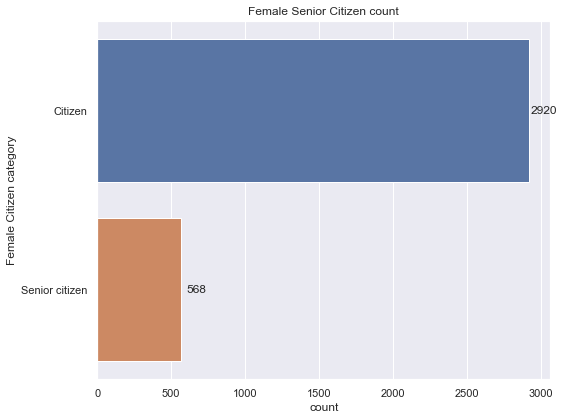

In [278]:
plt.figure(figsize=(8, 6))
plt.title("Female Senior Citizen count");
y=[0,1]
ax = sns.countplot(y="SeniorCitizen",data=femaleCount)
plt.ylabel("Female Citizen category")
plt.yticks(y,["Citizen","Senior citizen"])
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_width(),   p.get_y()+p.get_height()/2), 
                ha = 'center', va = 'center', xytext = (15, 0), 
                textcoords = 'offset points')
plt.tight_layout()
plt.show()

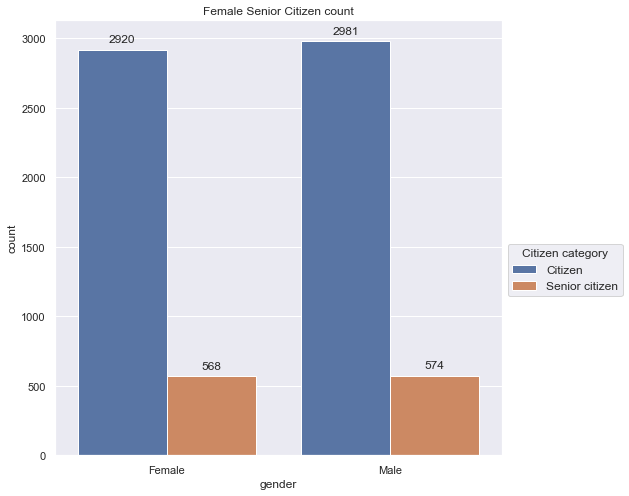

In [299]:
plt.figure(figsize=(8, 8))
plt.title("Female Senior Citizen count");
x=[0,1]
ax=sns.countplot(x="gender",hue="SeniorCitizen",data=df)
#plt.xlabel("Female Citizen category")
#plt.xticks(x,["Non Senior citizen","Senior citizen"])
#plt.show()
new_labels = ['Citizen', 'Senior citizen']
plt.legend(labels=new_labels,title = "Citizen category",bbox_to_anchor=(1, 0.5),fontsize="12")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points')

### Insights

    The total female senior citizen count is 538, this around 16% percentage of the total female customers.

## Compare 'tenure' with 'Total Charges'

In [147]:
#sns.scatterplot(y="tenure",x="TotalCharges",data=df)
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
19.65      8
20.05      8
          ..
3778       1
733.35     1
280.4      1
2954.5     1
521        1
Name: TotalCharges, Length: 6531, dtype: int64

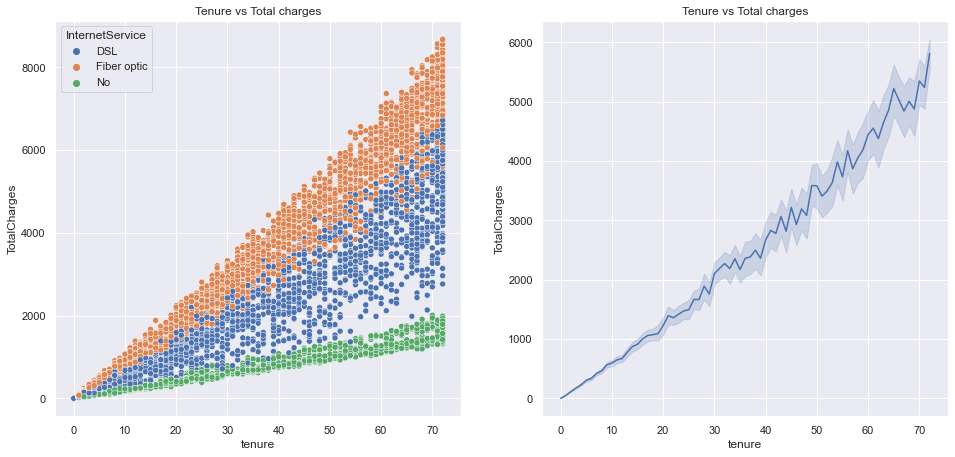

In [300]:
plt.figure(figsize=(16, 16))
#df = df.astype({"TotalCharges": float})
plt.subplot(221)
df.loc[df["TotalCharges"]==' ',"TotalCharges"]=0
#print (pd.to_numeric(df['TotalCharges'], errors='coerce'))
df = df.astype({"TotalCharges": float})
sns.scatterplot(x="tenure",y="TotalCharges",hue="InternetService",data=df)
plt.title("Tenure vs Total charges");


plt.subplot(222)
df.loc[df["TotalCharges"]==' ',"TotalCharges"]=0
#print (pd.to_numeric(df['TotalCharges'], errors='coerce'))
df = df.astype({"TotalCharges": float})
sns.lineplot(x="tenure",y="TotalCharges",data=df)
plt.title("Tenure vs Total charges");

### Insights

    There is a linear relationship between "tenure" and "total charges". As the tenure increases the total charges also increases
    The Customers who are subsribed to Internet service are paying a higher range in the total charges

## Contracts preffered by the senior citizen.

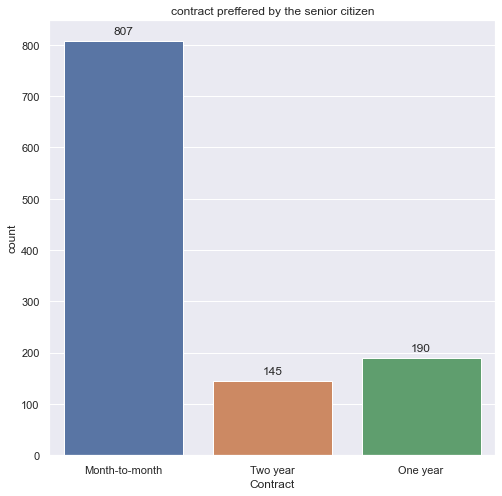

In [293]:
seniorData=df[df["SeniorCitizen"]==1]
plt.figure(figsize=(8, 8))

ax = sns.countplot(x="Contract",data=seniorData)
plt.title("contract preffered by the senior citizen");

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points')

### Insights

    70.7% of the Senior citizen preferred "Month-to-month" contract
    16.6% of the Senior citizen preferred "One year" contract
    12.7% of the Senior citizen preferred "Two year" contract
    

## Payment Method Analysis

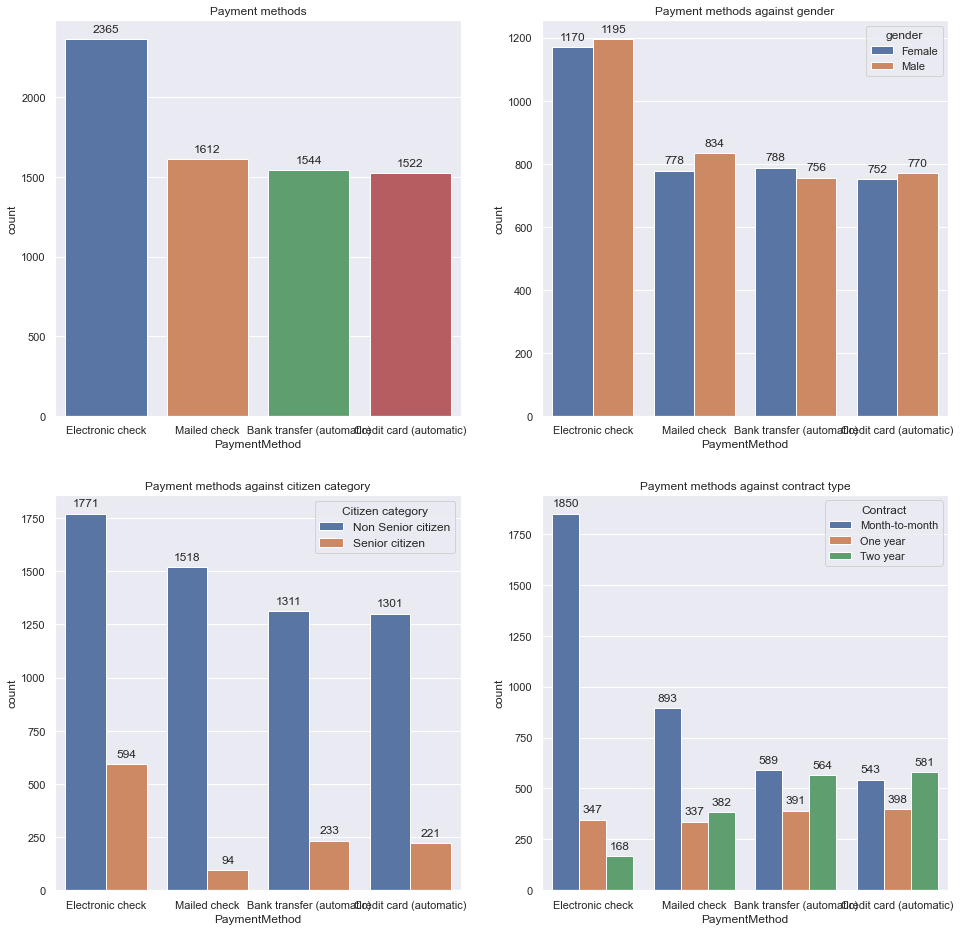

In [305]:
plt.figure(figsize=(16, 16))

plt.subplot(221)
ax = sns.countplot(x="PaymentMethod",data=df)
plt.title("Payment methods");
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points')

plt.subplot(222)
ax = sns.countplot(x="PaymentMethod", hue="gender", data=df)
plt.title("Payment methods against gender");
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points')

plt.subplot(223)
ax = sns.countplot(x="PaymentMethod", hue="SeniorCitizen", data=df)
plt.title("Payment methods against citizen category");
new_labels = ['Non Senior citizen', 'Senior citizen']
plt.legend(labels=new_labels,title = "Citizen category",fontsize="12")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points')

plt.subplot(224)
ax = sns.countplot(x="PaymentMethod", hue="Contract", data=df)
plt.title("Payment methods against contract type");
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points')

### Insights

    The most preferred payment method is "Electronic check" and least preferred is "Credit card"
    The most preferred payment method for senior citizen is "Electronic check" and least preferred is "Mailed check"
    Female and male customers preffered "Electronic check" as the payment method
    For "Two year" and "One year" contracts the preferred payment method is "Credit card"
    For "Month to month" contracts the preferred payment method is "Electronic check"